Imax = 10675 Dmax = 4808

N, Delta, mu 4706097 1508.364423076923 0.0003205128205128205


 R0 first part
0.08936533136807559
0.030266626702819287
0.0003185960705559925
0.34993582388341177
0.009724532368970602
 R0 first part all
0.47961091039383325

 R0 second part
0.12849658123651794
0.025568197286858163
0.0002691389188090333
0.6503500438093154
0.008214947921801878
 R0 second part all
0.8128989091733024

       S*              E*               I*               H*
       R*              D*               B*               P*
[3.64105319e+06 3.66927517e+02 3.41167359e+02 3.80432397e+02
 1.04451519e+06 6.23079983e+02 6.55873666e+02 1.19125358e+01]

R0 =  1.2925098195671356 , (R0-1)/R0 =  0.22631148726212216
second derivative
[ -39.13050054  446.44138586 -844.93413961  433.29035079    0.
    4.33290351    0.            2.62600213]
eigenvalues
[-3.20512821e-04+0.j         -1.44590913e+00+0.j
 -9.59331556e-01+0.65691683j -9.59331556e-01-0.65691683j
  4.73182167e-02+0.j         -1.09532970e-02+0

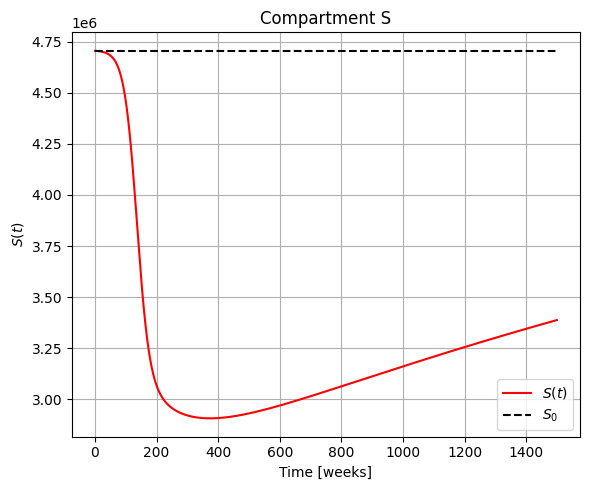

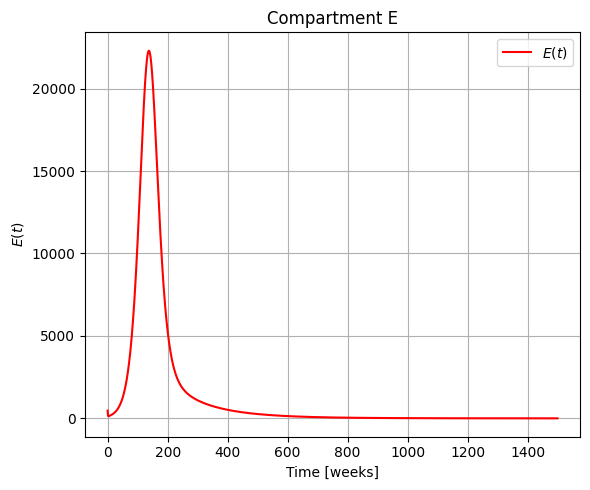

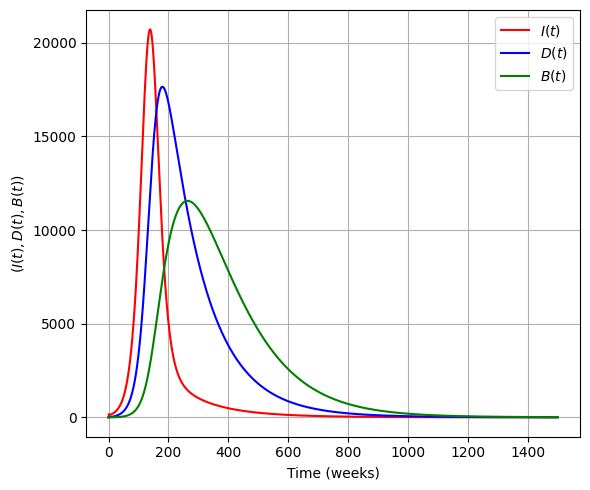

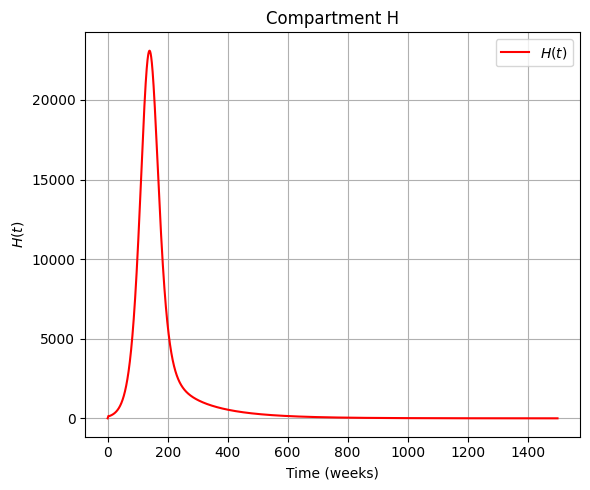

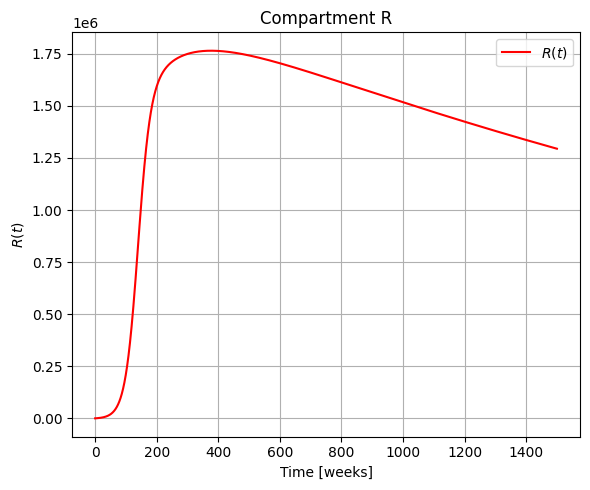

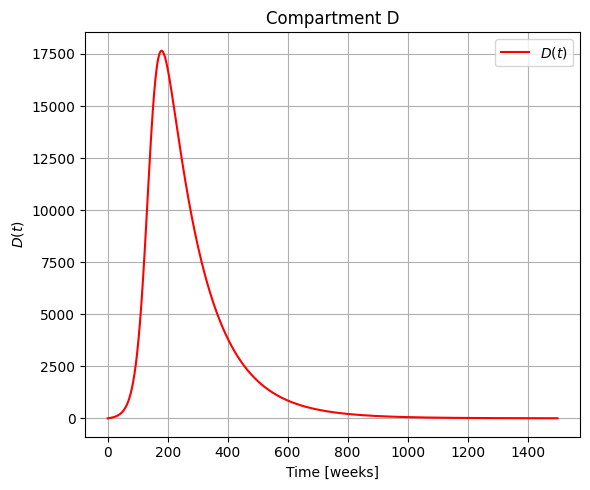

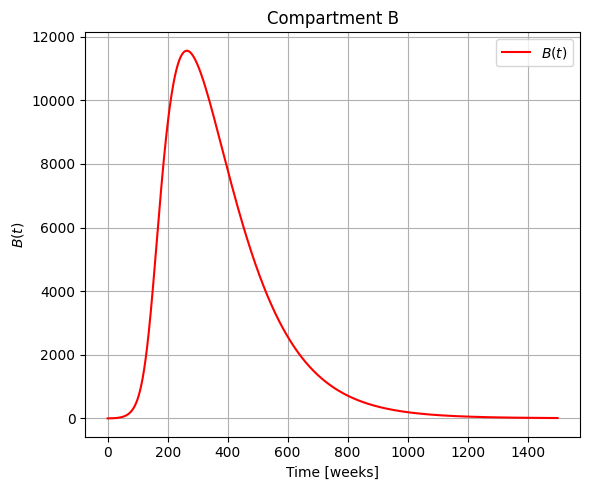

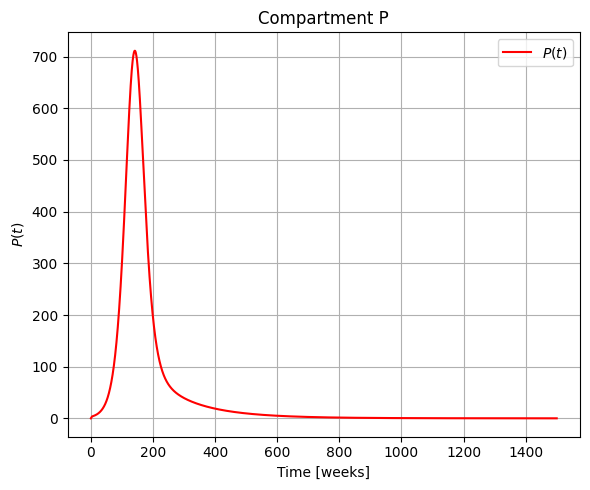

In [1]:
# PARAMETER ESTIMATION USING THE LEAST SQUARE METHOD
# EBOLA VIRUS MODEL SEIHRDBP
# CODE by Ijuptil Joseph K. 07/03/2024
import numpy as np
from scipy.integrate import odeint
from scipy.linalg import eig
import matplotlib.pyplot as plt
import pandas as pd

Tend = 1500.
#Tend = 15000.
#Tend = 10000.
#Tend = 500.
#Tend = 300.

guess_params = np.zeros(17)
guess_params[0] = 0.93  # Increase delta to speed up progression to I
guess_params[1]  = 0.0000000190      # beta
guess_params[2]  = 0.0000000245      # beta_1
guess_params[3]  = 0.0000000065      # beta_2
guess_params[4]  = 0.0000000000650   # beta_3
guess_params[5] = 0.00000620         #beta_p
guess_params[6] = 0.00990            # gamma
guess_params[7]  = 0.990             # gamma_1    # very sensitve


guess_params[8]  = 0.006        # sigma
guess_params[10] = 0.00010      # d_1

guess_params[11] = 0.00750      # eta
guess_params[12] = 0.88000      # xi

guess_params[13] = 0.01000      # d change sentisive

guess_params[15] = 0.010        # eta_1
guess_params[16] = 0.50000      # alpha

guess_params[9] = 0.65*guess_params[10]      # b_1 = 0.9*d_1
guess_params[14] = 0.95*guess_params[13]      # b   = 1.1*d



mu = 1./(52*60.)
delta = guess_params[0]
gamma = guess_params[6]
gamma_1 = guess_params[7]
eta   = guess_params[11]
xi    = guess_params[12]
a1 = delta + mu
a2 = gamma + gamma_1 + mu
a3 = eta + xi + mu

# Define the system of differential equations
def ebola_model(y, t, params):
    S, E, I, H, R, D, B, P = y
    mu = 1./(52*60.)
    Delta = N*mu
    phi_p = 0.000
    # 0      1     2       3       4       5       6       7        8    9   10   11   12  13 14  15     16
    delta, beta, beta_1, beta_2, beta_3, beta_p, gamma, gamma_1, sigma, b_1, d_1, eta, xi, d, b, eta_1, alpha = params

    Psi = beta*I + beta_1*H + beta_2*D + beta_3*B + beta_p*P
    dSdt =  Delta - (Psi + mu)*S
    dEdt = Psi*S - a1*E
    dIdt = delta*E - a2*I
    dHdt = gamma_1*I - a3*H
    dRdt = xi*H -  mu*R
    dDdt = gamma*I + eta*H - d*D
    dBdt = d*D - b*B
    dPdt = phi_p + sigma*I + eta_1*H + d_1*D + b_1*B - alpha*P

    return [dSdt, dEdt, dIdt, dHdt, dRdt, dDdt, dBdt, dPdt]

def Dfcn(y,params):
    S, E, I, H, R, D, B, P = y
    mu = 1./(52*60.)
    Delta = N*mu
    phi_p = 0.000

    # 0      1     2       3       4       5       6       7        8    9   10   11   12  13 14  15     16
    delta, beta, beta_1, beta_2, beta_3, beta_p, gamma, gamma_1, sigma, b_1, d_1, eta, xi, d, b, eta_1, alpha = params

    dy = ebola_model(y, 0, params)
    dS, dE, dI, dH, dR, dD, dB, dP = dy

    Psi = beta*I + beta_1*H + beta_2*D + beta_3*B + beta_p*P
    dPsi = beta*dI + beta_1*dH + beta_2*dD + beta_3*dB + beta_p*dP

    ddS = -dPsi*S - (Psi + mu)*dS
    ddE = dPsi*S + Psi*dS - a1*dE
    ddI = delta*dE - a2*dI
    ddH = gamma_1*dI - a3*dH
    ddR = xi*dH - mu*dR
    ddD = gamma*dI + eta*dH - d*dD
    ddB = d*dD - b*dB
    ddP = sigma*dI + eta_1*dH + d_1*dD + b_1*dB - alpha*dP
    print('second derivative')
    print(np.array([ddS,ddE,ddI,ddH,ddR,ddD,ddB,ddP]))
    return

def Jac(y,params):
    S, E, I, H, R, D, B, P = y
    mu = 1./(52*60.)
    Delta = N*mu
    phi_p = 0.000
    # 0      1     2       3       4       5       6       7        8    9   10   11   12  13 14  15     16
    delta, beta, beta_1, beta_2, beta_3, beta_p, gamma, gamma_1, sigma, b_1, d_1, eta, xi, d, b, eta_1, alpha = params

    Psi = beta*I + beta_1*H + beta_2*D + beta_3*B + beta_p*P
    J = np.zeros((8,8))
    J[0,0] = -(Psi + mu)
    J[0,2] = -beta*S
    J[0,3] = -beta_1*S
    J[0,5] = -beta_2*S
    J[0,6] = -beta_2*S
    J[0,7] = -beta_p*S

    J[1,0] = (Psi + mu)
    J[1,1] = -a1
    J[1,2] = beta*S
    J[1,3] = beta_1*S
    J[1,5] = beta_2*S
    J[1,6] = beta_2*S
    J[1,7] = beta_p*S

    J[2,1] = delta
    J[2,2] = -a2

    J[3,2] = gamma_1
    J[3,3] = -a3

    J[4,3] = xi
    J[4,4] = -mu

    J[5,2] = gamma
    J[5,3] = eta
    J[5,5] = -d

    J[6,5] = d
    J[6,6] = -b

    J[7,2] = sigma
    J[7,3] = eta_1
    J[7,5] = d_1
    J[7,6] = b_1
    J[7,7] = -alpha

    [v,w] = eig(J)
    print('eigenvalues')
    print(v)
    return


def ebola_R0(params):
    " computation of R_0 and the corresponding steady state solution for phi_p = 0! "
    mu = 1./(52*60.)
    Delta = N*mu
    phi_p = 0.000       # DO not alter

    # 0      1     2       3       4       5       6       7        8    9   10   11   12  13 14  15     16
    delta, beta, beta_1, beta_2, beta_3, beta_p, gamma, gamma_1, sigma, b_1, d_1, eta, xi, d, b, eta_1, alpha = params

    a1 = delta + mu
    a2 = gamma + gamma_1 + mu
    a3 = eta + xi + mu
    print('')
    print(' R0 first part')
    print(( beta  ) * Delta*delta/(mu*a1*a2))
    print(( beta_2*gamma/d  ) * Delta*delta/(mu*a1*a2))
    print(( beta_3*gamma/b  ) * Delta*delta/(mu*a1*a2))
    print(( beta_p*sigma/alpha ) * Delta*delta/(mu*a1*a2))
    print(( beta_p*gamma/alpha*(d_1/d+b_1/b) ) * Delta*delta/(mu*a1*a2))
    print(' R0 first part all')
    print(( beta + beta_2*gamma/d + beta_3*gamma/b + beta_p*sigma/alpha + beta_p*gamma/alpha*(d_1/d+b_1/b) ) * Delta*delta/(mu*a1*a2) )
    print('')

    print(' R0 second part')
    print(( beta_1  ) *  Delta*delta*gamma_1/(mu*a1*a2*a3) )
    print(( beta_2*eta/d ) *  Delta*delta*gamma_1/(mu*a1*a2*a3) )
    print(( beta_3*eta/b ) *  Delta*delta*gamma_1/(mu*a1*a2*a3) )
    print(( beta_p*eta_1/alpha ) *  Delta*delta*gamma_1/(mu*a1*a2*a3) )
    print(( beta_p*eta/alpha*(d_1/d+b_1/b) ) *  Delta*delta*gamma_1/(mu*a1*a2*a3) )
    print(' R0 second part all')
    print(( beta_1 + beta_2*eta/d + beta_3*eta/b + beta_p*eta_1/alpha + beta_p*eta/alpha*(d_1/d+b_1/b) ) *  Delta*delta*gamma_1/(mu*a1*a2*a3) )
    print('')
    R0 = ( beta + beta_2*gamma/d + beta_3*gamma/b + beta_p*sigma/alpha + beta_p*gamma/alpha*(d_1/d+b_1/b) ) * Delta*delta/(mu*a1*a2) + \
         ( beta_1 + beta_2*eta/d + beta_3*eta/b + beta_p*eta_1/alpha + beta_p*eta/alpha*(d_1/d+b_1/b) ) *  Delta*delta*gamma_1/(mu*a1*a2*a3)

    QS = Delta/(mu*R0)
    QE = Delta*(R0-1.)/(a1*R0)
    QI = Delta*delta*(R0-1.)/(a1*a2*R0)
    QH = Delta*delta*gamma_1*(R0-1.)/(a1*a2*a3*R0)
    QR = Delta*delta*gamma_1*xi*(R0-1.)/(mu*a1*a2*a3*R0)
    QD = (gamma/a2 + eta*gamma_1/(a2*a3))*Delta*delta*(R0-1.)/(d*a1*R0)
    QB = (gamma/a2 + eta*gamma_1/(a2*a3))*Delta*delta*(R0-1.)/(b*a1*R0)
    QP = (sigma/a2 + eta_1*gamma_1/(a2*a3) + (d_1/d+b_1/b)*(gamma/a2 + eta*gamma_1/(a2*a3))) * Delta*delta*(R0-1.)/(alpha*a1*R0)
    print('       S*              E*               I*               H*')
    print('       R*              D*               B*               P*')
    QQ = np.array([QS,QE,QI,QH,QR,QD,QB,QP])
    print(QQ)
    print('')
    return R0


Imax = 10675
Dmax = 4808
print('Imax =',Imax,'Dmax =',Dmax)
print('')

# Population
N = 4706097
mu = 1./(52*60.)
Delta = N*mu
print('N, Delta, mu',N,Delta,mu)
print('')

RR0 = ebola_R0(guess_params)
print('R0 = ',RR0,', (R0-1)/R0 = ',(RR0-1)/RR0)
if RR0 < 1.:
    exit(1)

tt = np.linspace(0.,Tend, 35001)

# Assign values to the y0 array
#y0 = np.array([0.980*N,0.015*N,0.005*N,0.0000*N,0.0000*N,0.00000*N,0.00000*N,0.])
S0 = 0.9999*N
I0 = 1./3.*(N - S0)
E0 = N - S0
I0 = 0.
#y0 = np.array([S0,E0,I0,0.0000*N,0.0000*N,0.00000*N,0.00000*N,0.])
y0 = np.array([S0,E0,I0,0.0000*N,0.0000*N,0.00000*N,0.00000*N,0.])
Dfcn(y0,guess_params)
Jac(y0,guess_params)
print('')

t1 = np.linspace(0.,1500., 4001)
sol = odeint(ebola_model, y0, t1, args=(guess_params,))
y1 = sol[-1,:]
Jac(y1,guess_params)
print('')

sol = odeint(ebola_model, y0, tt, args=(guess_params,))
print('')
print('Parameter:')
print(guess_params)
print('')

if RR0 < 1.0:
    print('Alarm: R0 =',RR0)

plt.figure(figsize=(6, 5))
plt.plot(tt, sol[:, 0], 'r-', label='$S(t)$')
plt.plot([0,tt[-1]], [N, N], 'k--', label='$S_0$')
plt.xlabel('Time [weeks]')
plt.ylabel('$S(t)$')
plt.title('Compartment S')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.figure(figsize=(6, 5))
plt.plot(tt, sol[:, 1], 'r-', label='$E(t)$')
plt.xlabel('Time [weeks]')
plt.ylabel('$E(t)$')
plt.title('Compartment E')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.figure(figsize=(6, 5))
plt.plot(tt, sol[:, 2], 'r-', label='$I(t)$')
plt.plot(tt, sol[:, 5], 'b-', label='$D(t)$')
plt.plot(tt, sol[:, 6], 'g-', label='$B(t)$')
#plt.ylim([0,15000])
plt.xlabel('Time (weeks)')
plt.ylabel('($I(t), D(t), B(t))$')
#plt.title('Compartment I')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the figure
#plt.savefig('plot.png')  # Save as PNG file

plt.figure(figsize=(6, 5))
plt.plot(tt, sol[:, 3], 'r-', label='$H(t)$')
plt.xlabel('Time (weeks)')
plt.ylabel('$H(t)$')
plt.title('Compartment H')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.figure(figsize=(6, 5))
plt.plot(tt, sol[:, 4], 'r-', label='$R(t)$')
plt.xlabel('Time [weeks]')
plt.ylabel('$R(t)$')
plt.title('Compartment R')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.figure(figsize=(6, 5))
plt.plot(tt, sol[:, 5], 'r-', label='$D(t)$')
plt.xlabel('Time [weeks]')
plt.ylabel('$D(t)$')
plt.title('Compartment D')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.figure(figsize=(6, 5))
plt.plot(tt, sol[:, 6], 'r-', label='$B(t)$')
plt.xlabel('Time [weeks]')
plt.ylabel('$B(t)$')
plt.title('Compartment B')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.figure(figsize=(6, 5))
plt.plot(tt, sol[:, 7], 'r-', label='$P(t)$')
plt.xlabel('Time [weeks]')
plt.ylabel('$P(t)$')
plt.title('Compartment P')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

